# Fama-French 3-Factor Model(1992) Empirics

\begin{align*}
(r_i - r_f) = \alpha + \beta (r_M - r_f) + \theta_s SMB + \theta_v HML +\epsilon
\end{align*}

[FAMA-French Library](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html)

자산들의 수익률에 영향을 미칠 수 있는 여러가지 변수들을 고려해 보자라는 취지로 만들어진 모델임

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# factors(market, smb, hml)
factors = pd.read_csv('F-F_Research_Data_Factors.csv',index_col=0, header=3).dropna()
factors.columns = ['market', 'smb', 'hml', 'rf']
factors.head()

,market,smb,hml,rf
192607,2.96,-2.30,-2.87,0.22
192608,2.64,-1.40,4.19,0.25
192609,0.36,-1.32,0.01,0.23
192610,-3.24,0.04,0.51,0.32
192611,2.53,-0.20,-0.35,0.31


In [3]:
factors.index = factors.index.map(lambda x: datetime.strptime(str(x), "%Y%m"))
factors.head()

,market,smb,hml,rf
1926-07-01,2.96,-2.30,-2.87,0.22
1926-08-01,2.64,-1.40,4.19,0.25
1926-09-01,0.36,-1.32,0.01,0.23
1926-10-01,-3.24,0.04,0.51,0.32
1926-11-01,2.53,-0.20,-0.35,0.31


In [4]:
# 6 portfolios (ize: 2, value: 3)

ptf = pd.read_csv('6_Portfolios_2x3.csv',index_col=0, header=15).dropna()
ptf.index = ptf.index.map(lambda x: datetime.strptime(str(x), "%Y%m"))
ptf.columns = ['s_bm1','s_bm2','s_bm3','b_bm1','b_bm2','b_bm3']
ptf.head()

,s_bm1,s_bm2,s_bm3,b_bm1,b_bm2,b_bm3
1926-07-01,1.3724,0.9081,-0.0695,5.7168,1.9642,1.4222
1926-08-01,0.6095,1.5075,5.3842,2.7154,2.6838,6.3154
1926-09-01,-2.6779,-0.1359,-0.4374,1.4287,0.0709,-0.7967
1926-10-01,-3.5365,-4.3572,-2.0112,-3.5898,-2.3460,-4.0970
1926-11-01,3.1210,3.6608,2.0944,3.1292,2.8965,3.4614


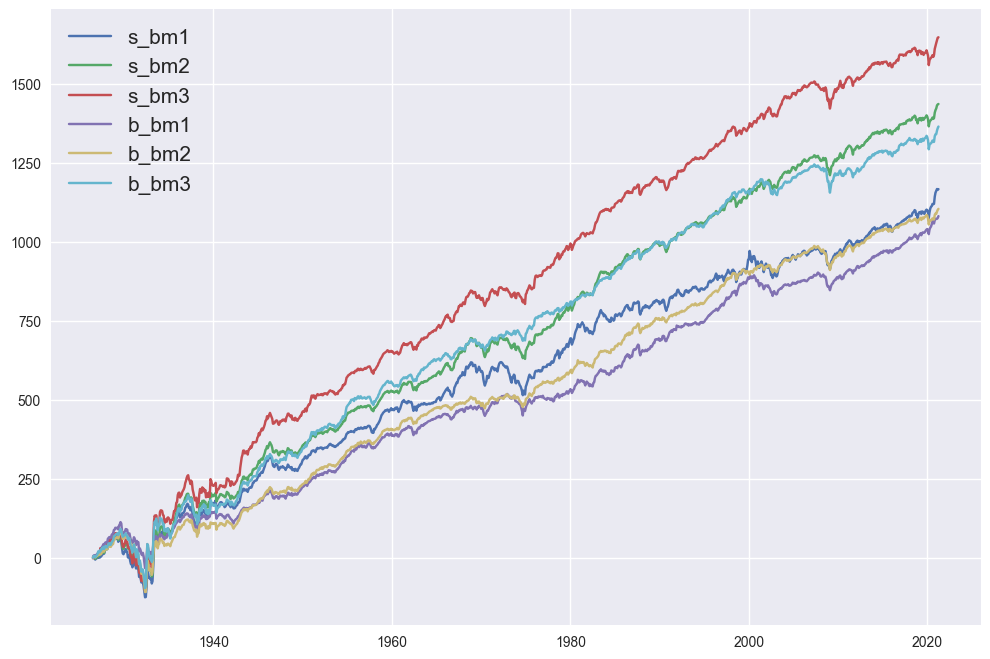

In [15]:
# performances of potfolios

plt.figure(figsize=(12,8))
for col in ptf.columns :
    plt.plot(ptf[col].cumsum(), label=col)
plt.style.use('seaborn')
plt.grid(True)
plt.legend(fontsize = 15)
plt.show()

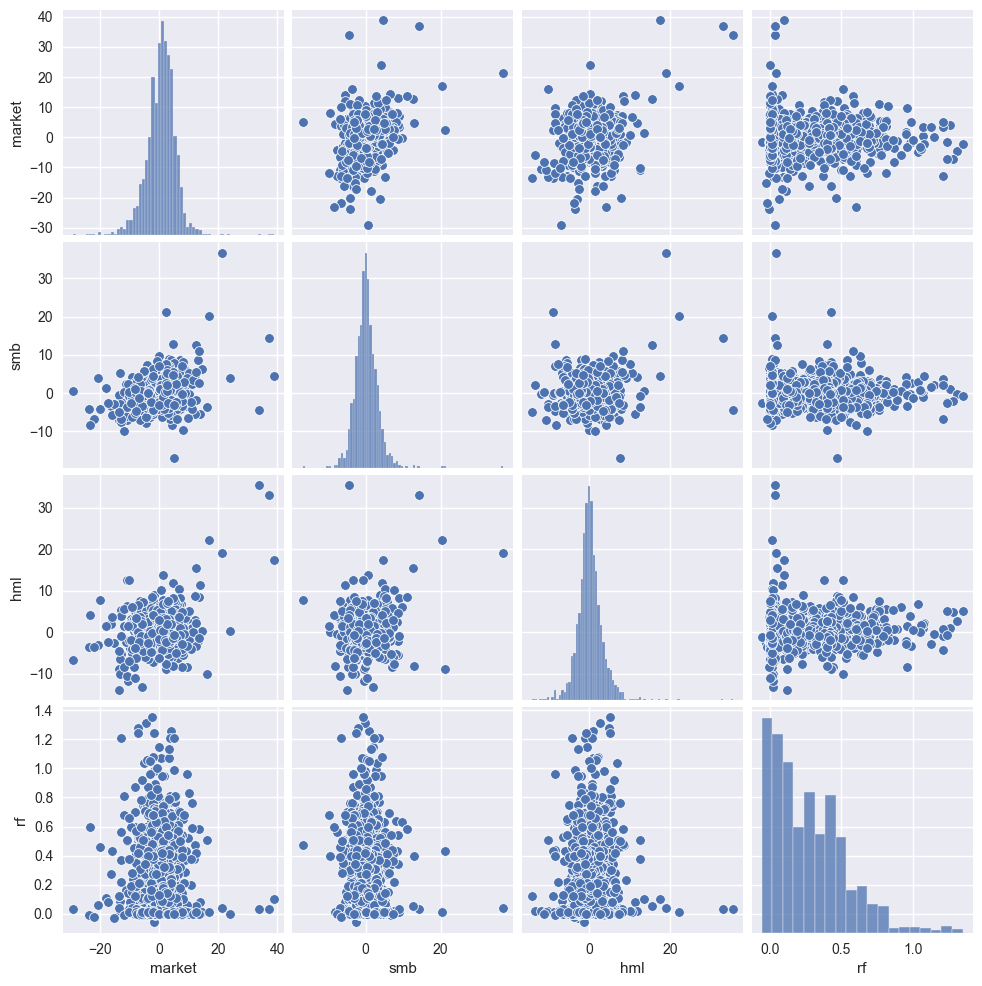

In [16]:
sns.pairplot(factors)
plt.show()
#다중공선성 테스트

In [17]:
df = pd.concat([ptf, factors], axis=1)
#axis = 1 이란 뜻은 factors를 좌우로 합쳐준다는 뜻이다.
df.head()

,s_bm1,s_bm2,s_bm3,b_bm1,b_bm2,b_bm3,market,smb,hml,rf
1926-07-01,1.3724,0.9081,-0.0695,5.7168,1.9642,1.4222,2.96,-2.30,-2.87,0.22
1926-08-01,0.6095,1.5075,5.3842,2.7154,2.6838,6.3154,2.64,-1.40,4.19,0.25
1926-09-01,-2.6779,-0.1359,-0.4374,1.4287,0.0709,-0.7967,0.36,-1.32,0.01,0.23
1926-10-01,-3.5365,-4.3572,-2.0112,-3.5898,-2.3460,-4.0970,-3.24,0.04,0.51,0.32
1926-11-01,3.1210,3.6608,2.0944,3.1292,2.8965,3.4614,2.53,-0.20,-0.35,0.31


In [22]:
ols = sm.OLS(y,X)
res = ols.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  s_bm1   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                          1.406e+04
Date:                Thu, 12 May 2022   Prob (F-statistic):                        0.00
Time:                        16:54:34   Log-Likelihood:                         -1847.4
No. Observations:                1138   AIC:                                      3701.
Df Residuals:                    1135   BIC:                                      3716.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
market         1.0879      0.007    148.544      0.000       1.073       1.102
smb            1.0356      0.012     85.573      0.000       1.012       1.059
hml           -0.1827      0.011    -17.103      0.000      -0.204      -0.162
==============================================================================
Omnibus:                      149.118   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1214.279
Skew:                           0.295   Prob(JB):                    2.10e-264
Kurtosis:                       8.026   Cond. No.                         1.92
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
import statsmodels.api as sm

y = df['s_bm1']
X = df[['market', 'smb', 'hml']]

ols = sm.OLS(y,sm.add_constant(X)).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  s_bm1   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 1.393e+04
Date:                Thu, 12 May 2022   Prob (F-statistic):               0.00
Time:                        16:48:44   Log-Likelihood:                -1841.3
No. Observations:                1138   AIC:                             3691.
Df Residuals:                    1134   BIC:                             3711.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1279      0.037      3.491      0.000       0.056       0.200
market         1.0854      0.007    148.233      0.000       1.071       1.100
smb            1.0348      0.012     85.905      0.000       1.011       1.058
hml           -0.1851      0.011    -17.378      0.000      -0.206      -0.164
==============================================================================
Omnibus:                      152.188   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1256.036
Skew:                           0.308   Prob(JB):                    1.80e-273
Kurtosis:                       8.110   Cond. No.                         5.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
y = df['market']
X = df[['hml','smb','rf']]

ols = sm.OLS(y,sm.add_constant(X)).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 market   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     64.83
Date:                Thu, 12 May 2022   Prob (F-statistic):           1.09e-38
Time:                        16:58:44   Log-Likelihood:                -3432.2
No. Observations:                1138   AIC:                             6872.
Df Residuals:                    1134   BIC:                             6892.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8314      0.216      3.855      0.000       0.408       1.255
hml            0.3072      0.042      7.280      0.000       0.224       0.390
smb            0.4916      0.047     10.563      0.000       0.400       0.583
rf            -1.2851      0.583     -2.203      0.028      -2.429      -0.141
==============================================================================
Omnibus:                      126.415   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              944.093
Skew:                          -0.172   Prob(JB):                    9.84e-206
Kurtosis:                       7.449   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
a = 5
if not a > 6 or a < 4 :
    print('yes')

yes
